In [76]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 15.0)
plt.rcParams['font.family'] = "serif"

In [7]:
data_path = '../Data/Non Time Series/Neighborhood_CES_Covid.csv'

In [105]:
df = pd.read_csv(data_path, index_col=0)
df.head()

,population,cases,case_rate,deaths,death_rate,vax_count,vax_rate,ozone,pm,diesel,traffic_density,pollution_score,asthma_rate,population_char_score,children_percent,elderly_percent,tract_lists
City of Agoura Hills,20883.0,956.0,4578.0,14.0,67.0,3406.0,16309.917157,0.051865,9.536303,7.881444,1200.050000,4.629887,19.893333,2.959783,10.833333,11.266667,"[6037800332, 6037800327, 6037800324]"
City of Alhambra,86724.0,6568.0,7573.0,174.0,201.0,11914.0,13737.834971,0.049204,11.525000,22.743278,1382.278500,6.823814,31.803500,4.868749,9.980000,14.590000,"[6037481606, 6037481605, 6037480304, 603748080..."
City of Arcadia,57754.0,2555.0,4424.0,101.0,175.0,9674.0,16750.354954,0.051412,10.485542,12.843261,1135.541818,5.588927,16.549091,2.984220,9.972727,16.245455,"[6037430801, 6037430724, 6037430701, 603743170..."
City of Artesia,16795.0,1957.0,11652.0,54.0,322.0,2521.0,15010.419768,0.044312,11.210000,23.684496,1311.766667,5.672172,34.370000,5.959942,11.666667,12.766667,"[6037554802, 6037554900, 6037554801]"
City of Avalon,3869.0,14.0,362.0,0.0,0.0,250.0,6461.617989,0.040127,NaN,14.876867,NaN,3.978593,49.390000,4.783565,12.600000,11.300000,[6037599000]


In [106]:
df.sort_values(['population_char_score'],  ascending=False)[:10]

,population,cases,case_rate,deaths,death_rate,vax_count,vax_rate,ozone,pm,diesel,traffic_density,pollution_score,asthma_rate,population_char_score,children_percent,elderly_percent,tract_lists
Unincorporated - Hi Vista,1098.0,42.0,3825.0,0.0,0.0,36.0,3278.688525,0.064889,5.763686,0.392912,56.180000,3.846675,108.410000,9.320930,13.800000,14.300000,[6037900102]
Los Angeles - Florence-Firestone,47445.0,9010.0,18990.0,103.0,217.0,1812.0,3819.159026,0.046178,12.114615,26.053186,2552.130769,7.224783,84.359231,8.977773,19.800000,5.023077,"[6037239801, 6037239330, 6037239310, 603723932..."
Unincorporated - East Rancho Dominguez,15308.0,2678.0,17494.0,45.0,294.0,693.0,4527.044683,0.044312,12.050000,26.940000,699.000000,5.706702,87.610000,8.969365,19.700000,4.800000,[6037542103]
Los Angeles - Watts,42674.0,7197.0,16865.0,81.0,190.0,1738.0,4072.737498,0.044312,12.050000,25.040000,1408.496667,7.285841,88.311111,8.949154,21.855556,4.744444,"[6037535400, 6037242100, 6037242000, 603724220..."
Los Angeles - Century Palms/Cove,33766.0,5972.0,17686.0,69.0,204.0,1339.0,3965.527454,0.044312,12.050000,25.596083,2465.922857,6.306640,83.765714,8.886622,19.000000,5.514286,"[6037241002, 6037241001, 6037240900, 603724080..."
Los Angeles - West Vernon,53644.0,9786.0,18242.0,161.0,300.0,2920.0,5443.292819,0.046178,12.764000,27.924576,2049.540000,6.254228,91.670000,8.874246,16.180000,7.600000,"[6037231720, 6037232400, 6037232110, 603723160..."
Unincorporated - Athens Village,4897.0,1023.0,20890.0,27.0,551.0,439.0,8964.672248,0.044312,12.050000,27.840000,1815.310000,7.439245,81.720000,8.838591,14.800000,10.800000,[6037540901]
Los Angeles - Green Meadows,21505.0,3795.0,17647.0,42.0,195.0,848.0,3943.269007,0.044312,12.050000,24.762352,891.457500,6.110646,75.895000,8.763508,19.225000,6.475000,"[6037240010, 6037240020, 6037240700, 6037240600]"
Unincorporated - Florence-Firestone,64705.0,13159.0,20337.0,178.0,275.0,2540.0,3925.508075,0.045712,12.120000,24.218425,958.831667,7.143416,77.866667,8.729008,19.600000,5.425000,"[6037535002, 6037535001, 6037533001, 603753300..."
Unincorporated - Palmdale,842.0,109.0,12945.0,2.0,238.0,10.0,1187.648456,0.062163,5.763686,4.968429,368.080000,4.512176,65.730000,8.666750,19.200000,4.500000,[6037910101]


In [107]:
df.sort_values(['pollution_score'],  ascending=False)[:10]

,population,cases,case_rate,deaths,death_rate,vax_count,vax_rate,ozone,pm,diesel,traffic_density,pollution_score,asthma_rate,population_char_score,children_percent,elderly_percent,tract_lists
City of Irwindale,1459.0,246.0,16861.0,4.0,274.0,151.0,10349.554489,0.053109,11.21,20.235794,1668.780000,9.594516,39.660000,5.682596,12.900000,10.600000,[6037404600]
Unincorporated - Rancho Dominguez,2661.0,364.0,13679.0,5.0,188.0,268.0,10071.401729,0.042299,11.63,31.197840,1418.390000,9.341397,106.870000,7.872047,9.500000,17.800000,[6037543305]
Los Angeles - Wholesale District,36129.0,6113.0,16920.0,96.0,266.0,3742.0,10357.330676,0.046178,12.89,55.967109,2136.559000,9.239533,77.045000,6.927883,10.000000,9.650000,"[6037206031, 6037206020, 6037206010, 603720630..."
City of Commerce,13069.0,2323.0,17775.0,35.0,268.0,1124.0,8600.505012,0.046178,12.19,37.525512,2014.093333,9.226395,58.213333,7.247319,14.866667,10.433333,"[6037532303, 6037532302, 6037532304]"
Los Angeles - Elysian Park,5712.0,487.0,8526.0,3.0,53.0,804.0,14075.630252,0.046178,12.89,47.667736,1937.835000,8.984197,24.545000,5.384492,7.650000,16.350000,"[6037197700, 6037980010]"
Los Angeles - Little Tokyo,3133.0,372.0,11874.0,10.0,319.0,546.0,17427.385892,0.046178,12.89,62.680000,614.690000,8.868292,67.730000,7.358700,3.100000,25.600000,[6037206200]
Unincorporated - Whittier Narrows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046178,12.05,22.470000,1920.210000,8.811509,54.750000,5.523925,13.000000,13.600000,[6037433802]
Unincorporated - Avocado Heights,6775.0,1048.0,15469.0,12.0,177.0,517.0,7630.996310,0.049512,12.05,31.965035,1817.660000,8.797344,50.380000,6.590442,15.200000,8.800000,[6037408301]
City of Vernon,209.0,123.0,58852.0,1.0,478.0,46.0,22009.569378,0.046178,12.47,44.378887,988.140000,8.702994,95.190000,NaN,4.500000,12.500000,[6037532400]
Los Angeles - Regent Square,2780.0,230.0,8273.0,3.0,108.0,268.0,9640.287770,0.046178,12.05,26.877238,2570.230000,8.700531,34.060000,4.480119,11.800000,9.000000,[6037270200]


In [37]:
df.corr()['vax_rate'].sort_values()

population_char_score   -0.670811
asthma_rate             -0.510629
children_percent        -0.476967
cases                   -0.121657
diesel                  -0.114189
deaths                  -0.080837
population              -0.062876
traffic_density         -0.027522
pollution_score         -0.022616
ozone                    0.009158
vax_count                0.032328
pm                       0.083111
case_rate                0.174352
elderly_percent          0.624097
death_rate               0.884649
vax_rate                 1.000000
Name: vax_rate, dtype: float64

In [38]:
df.corr()['death_rate'].sort_values()

ozone                   -0.161439
elderly_percent         -0.142266
vax_count               -0.031785
population              -0.028678
cases                   -0.012651
deaths                   0.012676
children_percent         0.175059
traffic_density          0.203683
asthma_rate              0.213502
pm                       0.287749
case_rate                0.309572
pollution_score          0.362439
diesel                   0.382817
population_char_score    0.470027
vax_rate                 0.884649
death_rate               1.000000
Name: death_rate, dtype: float64

In [39]:
df.corr()['pollution_score'].sort_values()

ozone                   -0.539631
elderly_percent         -0.198564
vax_rate                -0.022616
vax_count                0.005018
population               0.050506
cases                    0.104026
asthma_rate              0.112347
deaths                   0.132999
children_percent         0.150688
population_char_score    0.301189
case_rate                0.320071
death_rate               0.362439
traffic_density          0.494943
pm                       0.697788
diesel                   0.718854
pollution_score          1.000000
Name: pollution_score, dtype: float64

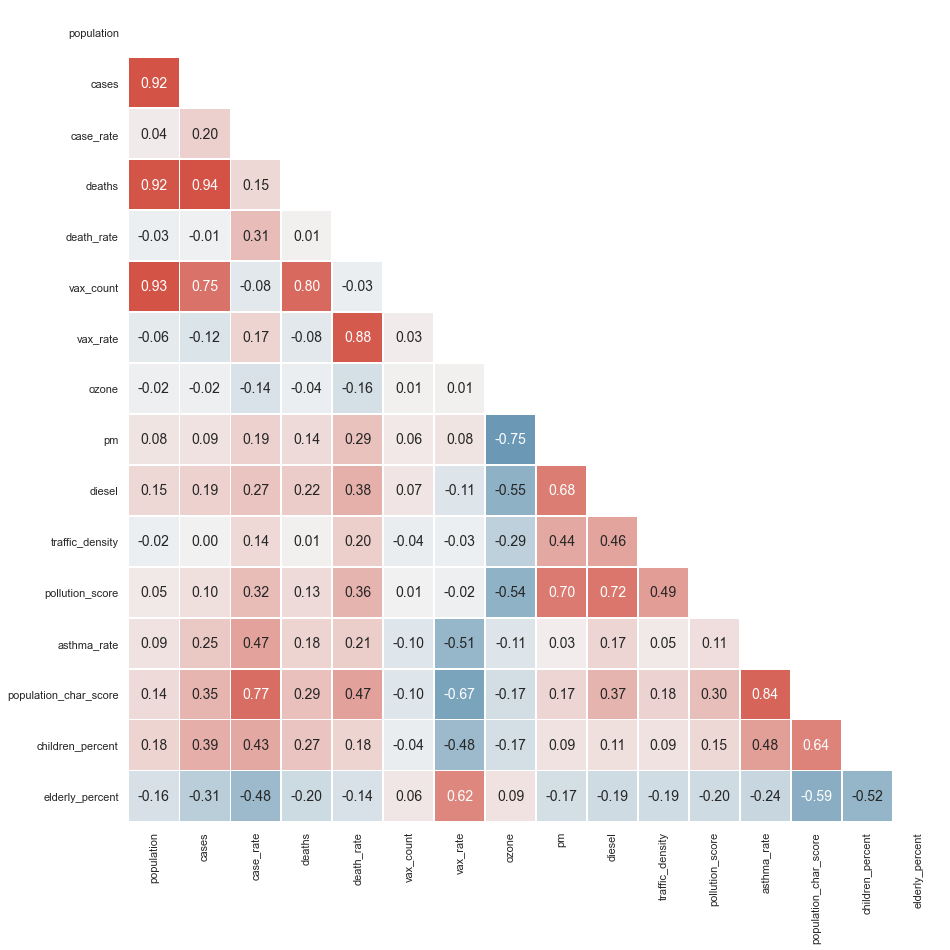

In [101]:
covid_cols = ['cases', 'case_rate', 'deaths', 'deaths_rate', 'vax_count', 'vax_rate']
ces_cols = [c for c in df.columns if c not in covid_cols and c != 'tract_lists']

corr = df.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(235, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
p = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, 
            robust=True, annot=True, annot_kws={'size':14}, fmt=".2f", cbar=False)
plt.show()